# Effective Pandas

Following along with a [talk][1] by Matt Harrison.

[1]: https://www.youtube.com/watch?v=zgbUk90aQ6A

In [1]:
import sys

In [2]:
sys.version

'3.9.7 (default, Sep  3 2021, 12:37:55) \n[Clang 12.0.5 (clang-1205.0.22.9)]'

In [3]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [5]:
pd.__version__

'1.3.1'

In [33]:
pd.options.display.min_rows = 20
pd.options.display.max_rows = 100

In [7]:
autos = pd.read_csv("https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
autos.shape

(41144, 83)

In [9]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [34]:
autos.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
fuelType            object
fuelType1           object
ghgScore             int64
ghgScoreA            int64
highway08            int64
highway08U         float64
highwayA08           int64
h

In [10]:
autos.memory_usage(deep=True).sum()

68383393

In [11]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr',
    'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']

In [12]:
autos[cols].memory_usage(deep=True)

Index             128
city08         329152
comb08         329152
highway08      329152
cylinders      329152
displ          329152
drive         3028369
eng_dscr      2135693
fuelCost08     329152
make          2606267
model         2813134
trany         2933276
range          329152
createdOn     3497240
year           329152
dtype: int64

In [13]:
autos[cols].memory_usage(deep=True).sum()

19647323

In [14]:
autos[cols].select_dtypes(int).describe()

,city08,comb08,highway08,fuelCost08,range,year
count,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000,41144.000000
mean,18.369045,20.616396,24.504667,2362.335942,0.793506,2001.535266
std,7.905886,7.674535,7.730364,654.981925,13.041592,11.142414
min,6.000000,7.000000,9.000000,500.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,1900.000000,0.000000,1991.000000
50%,17.000000,20.000000,24.000000,2350.000000,0.000000,2002.000000
75%,20.000000,23.000000,28.000000,2700.000000,0.000000,2011.000000
max,150.000000,136.000000,124.000000,7400.000000,370.000000,2020.000000


In [15]:
autos.cylinders.describe()

count    40938.000000
mean         5.717084
std          1.755517
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

In [16]:
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [17]:
(autos
 .query("cylinders.isna()")
 [["make", "model", "fuelType", "cylinders"]]
)

,make,model,fuelType,cylinders
7138,Nissan,Altra EV,Electricity,NaN
7139,Toyota,RAV4 EV,Electricity,NaN
8143,Toyota,RAV4 EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
9212,Toyota,RAV4 EV,Electricity,NaN
9213,Ford,Explorer USPS Electric,Electricity,NaN
10329,Toyota,RAV4 EV,Electricity,NaN
21413,Subaru,RX Turbo,Regular,NaN


In [18]:
autos.eng_dscr.str.contains("GUZZLER").value_counts(dropna=False)

False    24012
NaN      16153
True       979
Name: eng_dscr, dtype: int64

In [19]:
autos.guzzler.value_counts(dropna=False)

NaN    38721
G       1444
T        964
S         15
Name: guzzler, dtype: int64

In [71]:
mpg_by_year = (autos
 [autos.fuelType.isin({'Regular', 'Premium', 'Gasoline or E85', 'Premium or E85', 'Midgrade'})]
 .groupby("year")
 ["city08"]
 .mean()
)

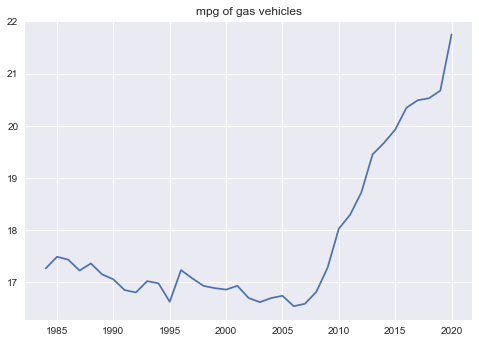

In [72]:
plt.plot(mpg_by_year)
plt.title("mpg of gas vehicles")
plt.show()

In [64]:
autos.fuelType.value_counts()

Regular                        26447
Premium                        11542
Gasoline or E85                 1317
Diesel                          1180
Electricity                      203
Premium or E85                   127
Midgrade                         106
CNG                               60
Premium and Electricity           53
Regular Gas and Electricity       41
Premium Gas or Electricity        36
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: fuelType, dtype: int64

In [65]:
autos.cylinders.value_counts(dropna=False)

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
NaN       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [66]:
autos.cylinders.dropna().astype(int).value_counts()

4     15938
6     14284
8      8801
5       771
12      626
3       279
10      170
2        59
16       10
Name: cylinders, dtype: int64

In [73]:
mpg_by_year = (autos
 [autos.fuelType.isin({'Regular', 'Premium', 'Gasoline or E85', 'Premium or E85', 'Midgrade'}) &
  autos.cylinders.isin({4,6,8})]
 [["year", "cylinders", "city08"]]
 .pivot_table(index="year", columns="cylinders", values="city08", aggfunc=np.mean)
)

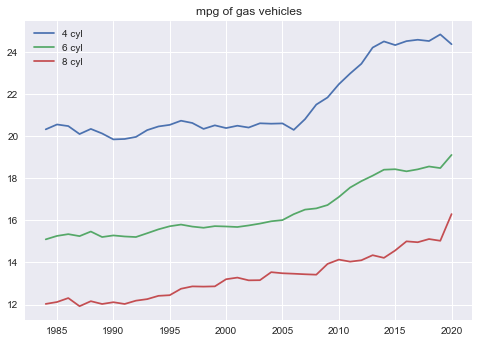

In [74]:
plt.plot(mpg_by_year)
plt.title("mpg of gas vehicles")
plt.legend(['4 cyl', '6 cyl', '8 cyl'])
plt.show()

<AxesSubplot:title={'center':'mpg of gas vehicles by number of cylinders'}, xlabel='year'>

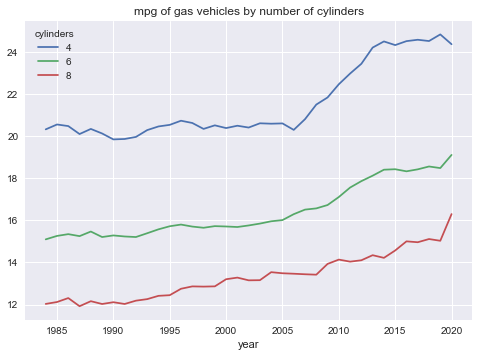

In [75]:
(autos
 [autos.fuelType.isin({'Regular', 'Premium', 'Gasoline or E85', 'Premium or E85', 'Midgrade'}) &
  autos.cylinders.isin({4,6,8})]
 [["year", "cylinders", "city08"]]
 .dropna()
 .assign(cylinders=lambda _df: _df.cylinders.astype(int))
 .pivot_table(index="year", columns="cylinders", values="city08", aggfunc=np.mean)
 .plot(title="mpg of gas vehicles by number of cylinders")
)